In [54]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

my_dict = {
    'quarterly_result': ['Sales', 'Net Profit', 'Sales', 'Net Profit','Sales', 'Net Profit'],
    'stockname': ['Stock1', 'Stock1', 'Stock2', 'Stock2', 'Stock3', 'Stock3'],
    'q1': [100, 10, 200, 20,500,45],
    'q2': [110, 20.6, 220, 22,503,44],
    'q3': [120, -20, 230, 40,510,48],
    'q4': [130, 40.5, 250, 49,550,50],
    'q5': [160, 60.9, 290, 70,570,200],
    'q6': [200, 88, 320, 98,300,-80]
}

df = pd.DataFrame(my_dict)
df

,quarterly_result,stockname,q1,q2,q3,q4,q5,q6
0,Sales,Stock1,100,110.0,120,130.0,160.0,200
1,Net Profit,Stock1,10,20.6,-20,40.5,60.9,88
2,Sales,Stock2,200,220.0,230,250.0,290.0,320
3,Net Profit,Stock2,20,22.0,40,49.0,70.0,98
4,Sales,Stock3,500,503.0,510,550.0,570.0,300
5,Net Profit,Stock3,45,44.0,48,50.0,200.0,-80


In [55]:
sales_df = df.loc[ df['quarterly_result'] == 'Sales']
profit_df = df.loc[ df['quarterly_result'] == 'Net Profit']

profit_df = profit_df.drop('quarterly_result', axis=1)
profit_df = profit_df.set_index('stockname').T
profit_df

stockname,Stock1,Stock2,Stock3
q1,10.0,20.0,45.0
q2,20.6,22.0,44.0
q3,-20.0,40.0,48.0
q4,40.5,49.0,50.0
q5,60.9,70.0,200.0
q6,88.0,98.0,-80.0


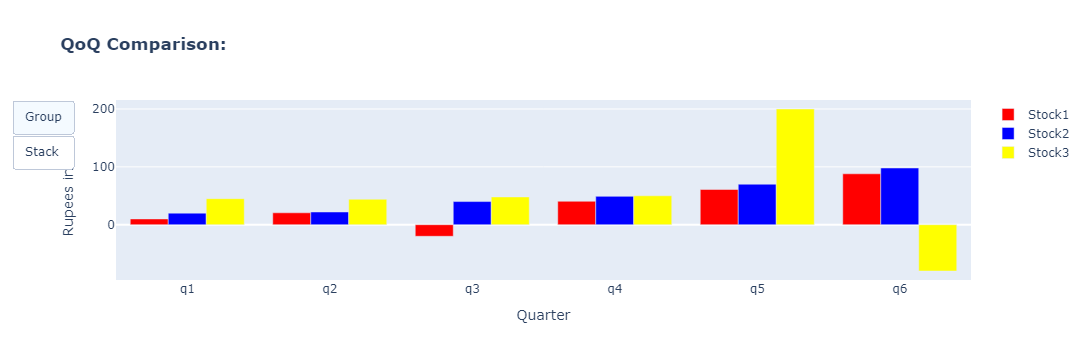

In [59]:
fig1 = go.Figure()

x =  profit_df.index

y1 = profit_df['Stock1']
y2 = profit_df['Stock2']
y3 = profit_df['Stock3']

fig1.add_trace(go.Bar(x=x, y=y1, name='Stock1', marker_color ="red"))
fig1.add_trace(go.Bar(x=x, y=y2, name='Stock2', marker_color ="blue"))
fig1.add_trace(go.Bar(x=x, y=y3, name='Stock3', marker_color ="yellow"))



plot_title = '<b> QoQ Comparison: </b>'

fig1.update_layout(
        title=plot_title,
        xaxis_title='Quarter',
        yaxis_title='Rupees in Cr.')


updatemenus=[
    dict(
        type="buttons",
        buttons=list([
            dict(
                label="Group",
                method="relayout",
                args=[{"barmode": "group"}]
            ),
            dict(
                label="Stack",
                method="relayout",
                args=[{"barmode": "stack"}]
            )
        ])
    )
]

#fig.update_traces(marker_color='green')


fig1.update_layout(updatemenus=updatemenus)


fig1.show()

In [36]:
profit_df.loc[ df['stockname'] == 'Stock1' ][profit_df.columns[2:]]

,q1,q2,q3,q4,q5,q6
1,10,20.6,-20,40.5,60.9,88


In [41]:
profit_df.loc[ df['stockname'] == 'Stock2' ][profit_df.columns[2:]]

,q1,q2,q3,q4,q5,q6
3,20,22.0,40,49.0,70.0,98


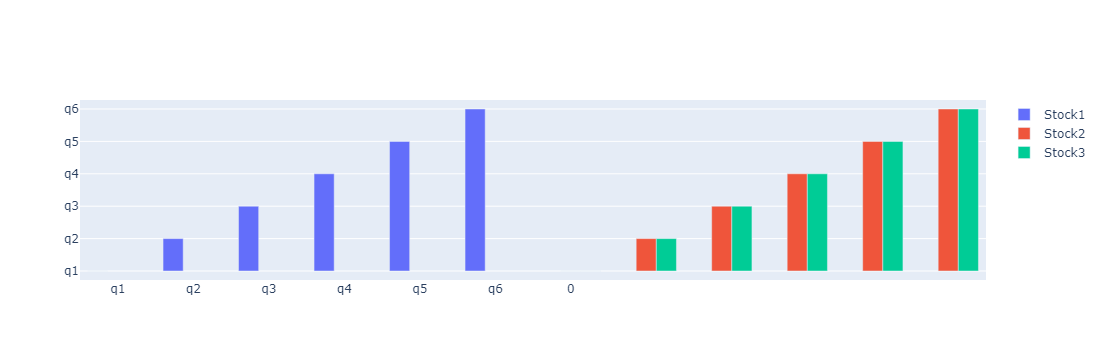

In [44]:
fig = go.Figure()

x = list( sales_df.columns[2:] )

y1 = list( profit_df.loc[ df['stockname'] == 'Stock1' ][profit_df.columns[2:]] )
y2 = list( profit_df.loc[ df['stockname'] == 'Stock2' ][profit_df.columns[2:]] )
y3 = list( profit_df.loc[ df['stockname'] == 'Stock3' ][profit_df.columns[2:]] )

fig.add_trace(go.Bar(x=x, y=y1, name='Stock1'))
fig.add_trace(go.Bar(y=y2, name='Stock2'))
fig.add_trace(go.Bar(y=y3, name='Stock3'))

fig.update_layout()
fig.show()

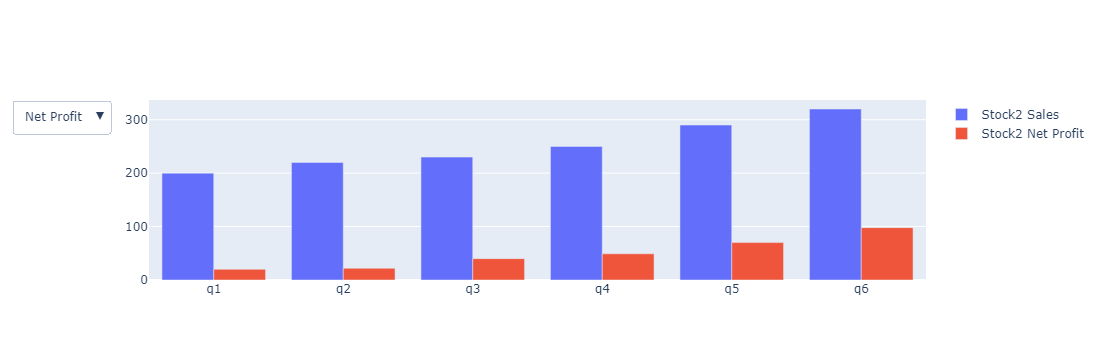

In [5]:

fig = go.Figure()

# List of quarters
x = df.columns[2:]

# Add traces for each metric
for result in df['quarterly_result'].unique():
    for stock in df['stockname'].unique():
        fig.add_trace(go.Bar(
            x=x,
            y=df[(df['stockname'] == stock) & (df['quarterly_result'] == result)].iloc[0, 2:],
            name=f'{stock} {result}'
        ))

# Add buttons to toggle the visibility
buttons = [{'label': label, 'method': 'update',
            'args': [{'visible': [True if label == i else False for i in df['quarterly_result']]}]}
           for label in df['quarterly_result'].unique()]

updatemenus = [{'buttons': buttons,
                'direction': "down",
                'showactive': True, }]

# update layout with buttons, and show the figure
fig.update_layout(updatemenus=updatemenus)
fig.show()

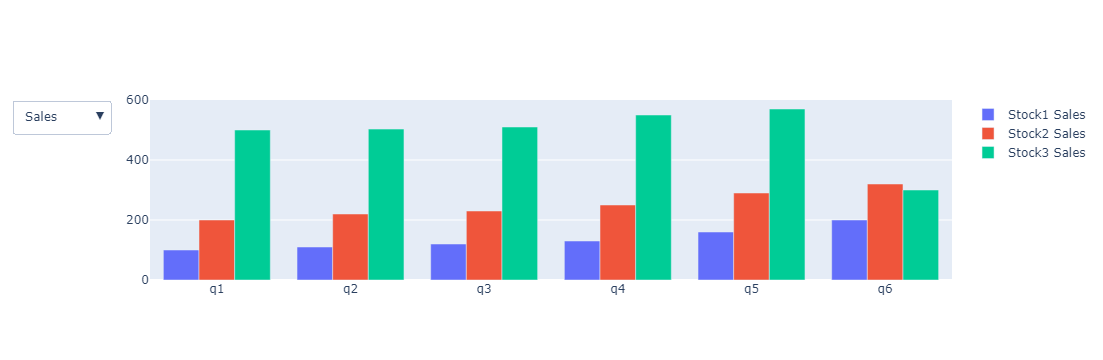

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

my_dict = {
    'quarterly_result': ['Sales', 'Net Profit', 'Sales', 'Net Profit','Sales', 'Net Profit'],
    'stockname': ['Stock1', 'Stock1', 'Stock2', 'Stock2', 'Stock3', 'Stock3'],
    'q1': [100, 10, 200, 20,500,45],
    'q2': [110, 20.6, 220, 22,503,44],
    'q3': [120, -20, 230, 40,510,48],
    'q4': [130, 40.5, 250, 49,550,50],
    'q5': [160, 60.9, 290, 70,570,200],
    'q6': [200, 88, 320, 98,300,-80]
}

df = pd.DataFrame(my_dict)
df



fig = go.Figure()

# List of quarters
x = df.columns[2:]

# Add traces for each metric
for result in df['quarterly_result'].unique():
    for stock in df['stockname'].unique():
        fig.add_trace(go.Bar(
            x=x,
            y=df[(df['stockname'] == stock) & (df['quarterly_result'] == result)].iloc[0, 2:],
            name=f'{stock} {result}'
        ))

# Add buttons to toggle the visibility
buttons = [{'label': label, 'method': 'update',
            'args': [{'visible': [label in trace.name for trace in fig.data]}]}
           for label in df['quarterly_result'].unique()]

updatemenus = [{'buttons': buttons,
                'direction': "down",
                'showactive': True, }]

# update layout with buttons, and show the figure
fig.update_layout(updatemenus=updatemenus)
fig.show()

In [4]:
df

,quarterly_result,stockname,q1,q2,q3,q4,q5,q6
0,Sales,Stock1,100,110.0,120,130.0,160.0,200
1,Net Profit,Stock1,10,20.6,-20,40.5,60.9,88
2,Sales,Stock2,200,220.0,230,250.0,290.0,320
3,Net Profit,Stock2,20,22.0,40,49.0,70.0,98
4,Sales,Stock3,500,503.0,510,550.0,570.0,300
5,Net Profit,Stock3,45,44.0,48,50.0,200.0,-80
